General imports:

In [1]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


### **Define Model**

In [2]:
struct fu <: Constants
	N::Int64  					# number of modes for solution S(z)
	L::Real                   	# half-domain length
	
	# domain definition
	dz::Float64 				# domain spacing
    z::Vector{Float64} 			# domain vector of values (2N + 2 points)

	# physical geometry constants 
	b::Float64 					# inner rod radius
	v::Float64					# fluid velocity 
	
	
	function fu(N::Int64, L::Real, b::Float64, v::Float64)
        dz = 2*L / (2*N+1)
        z = collect(-Float64(L):dz:Float64(L))

        new(N, L, dz, z, b, v)
    end
end

### **Define Wave Speed**

In [3]:
function c0(k, constants::fu)
	## linearized wave speed for small amplitude waves c(k)

	b = constants.b
	v = constants.v

	β0 = besseli(1, k) * besselk(1, k*b) - besseli(1, k*b) * besselk(1, k)
	β1 = besseli(1, k*b) * besselk(0, k) + besseli(0, k) * besselk(1, k*b) - (1/k)*β0

	alpha = (2*β0) / (β0 + k*β1)

    c0 = v * (sqrt(alpha) / (1 + sqrt(alpha)))

	return real.(c0)
	
end

c0 (generic function with 5 methods)

### **Plot dispersion relation for varying parameters**

In [4]:
function plot_dispersion(param_name::String, param_values::Vector, fixed_params::Dict, N::Int, L::Real)
	"""
	General function to plot c0 vs k for varying parameter values
	param_name: name of the varying parameter ("b" or "v")
	param_values: vector of parameter values to plot
	fixed_params: dict with fixed parameter values
	"""
	k_range = range(0.1, 20, length=200)
	
	p = plot(size=(800, 500))
	
	for val in param_values
		# Set up parameters
		if param_name == "b"
			constants = fu(N, L, val, fixed_params["v"])
			label_str = "b = $(round(val, digits=2))"
		else  # param_name == "v"
			constants = fu(N, L, fixed_params["b"], val)
			label_str = "v = $(round(val, digits=4))"
		end
		
		# Calculate c0 for each k
		c0_values = [c0(k, constants) for k in k_range]
		
		# Plot
		plot!(p, k_range, c0_values, label=label_str, linewidth=2)
	end
	
	xlabel!(p, "k")
	ylabel!(p, "c₀(k)")
	
	return p
end

plot_dispersion (generic function with 4 methods)

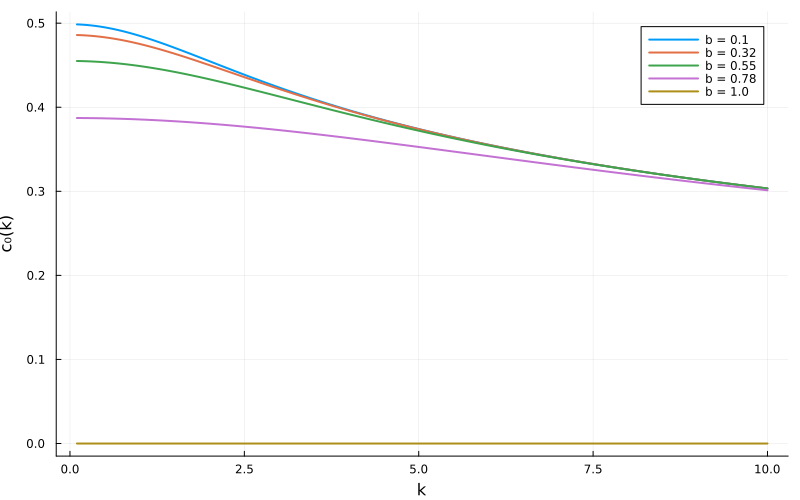

In [26]:
# Plot for varying b (with v = 1.0 fixed)
b_values = range(0.1, 1.0, length=5)
plot_dispersion("b", collect(b_values), Dict("v" => 1.0), 36, π)

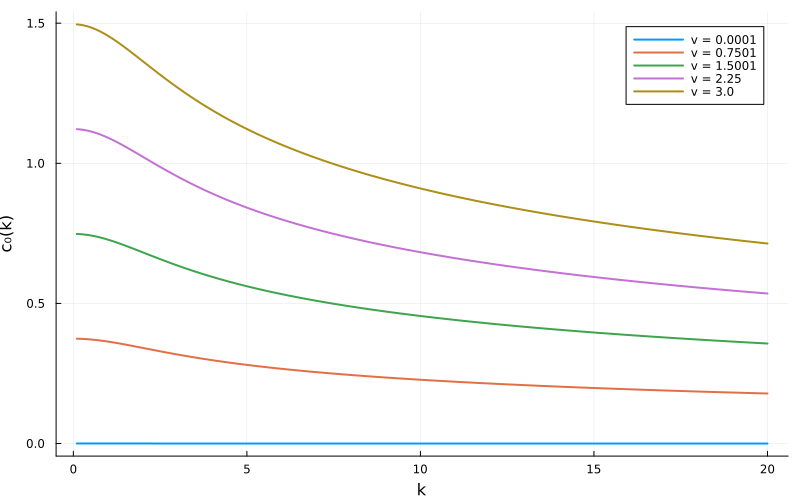

In [5]:
# Plot for varying v (with b = 0.1 fixed)
v_values = range(0.0001, 3.0, length=5)
plot_dispersion("v", collect(v_values), Dict("b" => 0.1), 36, π)

In [29]:
# compute c0 for k = 1 
N = 36 
L = π
b = 0.1
v = 1.0
constants = fu(N, L, b, v)
c0(1, constants)

0.4849384598859416